# Row Selector Model

## Variables

In [1]:
name = 'select_crystals'
folder = 'ds/rl_v02/rows/'

## Imports

In [2]:
import json
import numpy as np
import tensorflow as tf
import tensorflow.keras as kr
from tensorflow.keras.optimizers import SGD
from statistics import mean, median
import os
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from datetime import datetime

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

## Loading and preprocessing input

In [3]:
onlyfiles = [f for f in listdir(folder) if (isfile(join(folder, f))) and ('.json' in f)]

X = []
Y = []

for file in onlyfiles:
    with open(folder + file, 'r') as file:
        text = file.read().replace(os.linesep, '')
    data  = json.loads(text)
    prevX = []
    prevY = []
    for move in data:
        prevX.append(move[0])
        prevY.append(move[1])
    if (len(X) > 0):
        X = np.concatenate((X, np.array(prevX)), axis = 0)
        Y = np.concatenate((Y, np.array(prevY)), axis = 0)
    else:
        X = np.array(prevX)
        Y = np.array(prevY)

## Check data

In [4]:
print('input: ' + str(X.shape))
for i in range(X.shape[1]):
    print(str(i) + ': [' + str('{:.2f}'.format(min(X[:,i])))\
          + ', ' + str('{:.2f}'.format(mean(X[:,i]))) + ', ' + str('{:.2f}'.format(max(X[:,i]))) + ']')
print('---')  
print('output: ' + str(Y.shape))
for i in range(Y.shape[1]):
    print(str(i) + ': [' + str('{:.2f}'.format(min(Y[:,i]))) + ', ' + str('{:.2f}'.format(mean(Y[:,i])))\
          + ', ' + str('{:.2f}'.format(max(Y[:,i]))) + ']')

input: (18322278, 6)
0: [1.00, 2.53, 11.00]
1: [0.00, 1.10, 5.00]
2: [0.00, 1.09, 4.00]
3: [0.00, 1.04, 3.00]
4: [0.00, 0.82, 2.00]
5: [0.00, 0.47, 1.00]
---
output: (18322278, 6)
0: [0.00, 0.16, 0.17]
1: [0.00, 0.20, 1.00]
2: [0.00, 0.22, 0.98]
3: [0.00, 0.25, 0.96]
4: [0.00, 0.28, 0.94]
5: [0.00, 0.29, 0.92]


## Training model

In [5]:
timestamp = datetime.now(tz=None)
time_mark = '{:0>4}'.format(timestamp.year) + '{:0>2}'.format(timestamp.month) + '{:0>2}'.format(timestamp.day) \
+ '_' + '{:0>2}'.format(timestamp.hour) + '{:0>2}'.format(timestamp.minute) + '{:0>2}'.format(timestamp.second)

lr = 0.01           # learning rate
nn = [15, 25, 30, 25, 15, Y[0].shape[0]]  # número de neuronas por capa.

model = kr.Sequential()

# Añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[0], activation='relu', input_shape=X[0].shape))

# Añadimos la capa 2
l2 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadimos la capa 3
l3 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos la capa 4
l4 = model.add(kr.layers.Dense(nn[3], activation='relu'))

# Añadimos la capa 5
l5 = model.add(kr.layers.Dense(nn[4], activation='relu'))

# Añadimos la capa 6
l6 = model.add(kr.layers.Dense(nn[5], activation='sigmoid'))

adadelta = kr.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
sgd = SGD(lr=0.1)
model.compile(loss='mse', optimizer=adadelta, metrics=['acc'])

model.summary()

# Y entrenamos al modelo. Los callbacks 
history = model.fit(x=X, y=Y, batch_size=100, epochs=70, validation_split=0.2, verbose=2);

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                105       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                400       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                780       
_________________________________________________________________
dense_3 (Dense)              (None, 25)                775       
_________________________________________________________________
dense_4 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 96        
Tota

Epoch 66/70
14657822/14657822 - 138s - loss: 0.0205 - acc: 0.5506 - val_loss: 0.0205 - val_acc: 0.5382
Epoch 67/70
14657822/14657822 - 140s - loss: 0.0205 - acc: 0.5496 - val_loss: 0.0205 - val_acc: 0.5514
Epoch 68/70
14657822/14657822 - 139s - loss: 0.0205 - acc: 0.5502 - val_loss: 0.0205 - val_acc: 0.5508
Epoch 69/70
14657822/14657822 - 140s - loss: 0.0205 - acc: 0.5497 - val_loss: 0.0205 - val_acc: 0.5522
Epoch 70/70
14657822/14657822 - 149s - loss: 0.0205 - acc: 0.5498 - val_loss: 0.0205 - val_acc: 0.5374


## Visualize training history

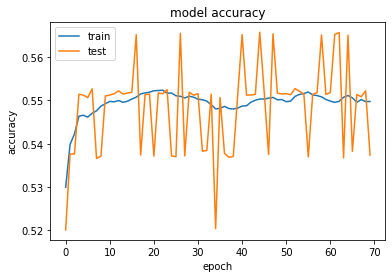

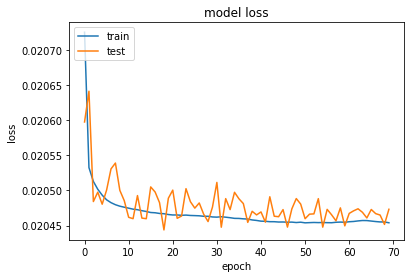

In [6]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(folder + 'model_accuracy_' + time_mark +'.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(folder + 'model_loss_' + time_mark +'.png')
plt.show()

## Testing model

In [7]:
model.predict(X[0:5])

array([[0.1669203 , 0.25804117, 0.25619847, 0.25306454, 0.35015887,
        0.26484662],
       [0.1669203 , 0.25804117, 0.25619847, 0.25306454, 0.35015887,
        0.26484662],
       [0.1669203 , 0.25804117, 0.25619847, 0.25306454, 0.35015887,
        0.26484662],
       [0.1669203 , 0.25804117, 0.25619847, 0.25306454, 0.35015887,
        0.26484662],
       [0.1669203 , 0.25804117, 0.25619844, 0.25306454, 0.3501589 ,
        0.26484662]], dtype=float32)

## Saving Model

In [8]:
model.save(folder + 'model' + time_mark + '.h5')

# End